 Imports

In [1]:
import kaggle
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler ,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  cross_val_score, GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_val_score
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, f1_score
import joblib 
from sklearn.model_selection import StratifiedKFold

Data loading from kaggle

In [2]:

kaggle.api.authenticate()#it will look for my api token
kaggle.api.dataset_download_files('shivamshinde123/autismprediction',path='.',unzip=True)

Dataset URL: https://www.kaggle.com/datasets/shivamshinde123/autismprediction


Loading data


In [3]:


train_d=pd.read_csv('train.csv')
test_d=pd.read_csv('test.csv')
print("train Data:")
print(train_d.head())
print("test Data:")
print(test_d.head())

train Data:
   ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0   1         1         0         1         0         1         0         1   
1   2         0         0         0         0         0         0         0   
2   3         1         1         1         1         1         1         1   
3   4         0         0         0         0         0         0         0   
4   5         0         0         0         0         0         0         0   

   A8_Score  A9_Score  ...  gender       ethnicity jaundice austim  \
0         0         1  ...       f               ?       no     no   
1         0         0  ...       m               ?       no     no   
2         1         1  ...       m  White-European       no    yes   
3         0         0  ...       f               ?       no     no   
4         0         0  ...       m               ?       no     no   

   contry_of_res used_app_before result     age_desc  relation Class/ASD  
0        Austria 

In [4]:
train_d['relation'].value_counts()

relation
Self                        709
?                            40
Parent                       29
Relative                     18
Others                        2
Health care professional      2
Name: count, dtype: int64

In [5]:
train_d.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.0000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,28.452118,4.672500,0.201250
std,231.0844,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.310966,3.494712,0.401185
min,1.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.718550,0.000000,0.000000
25%,200.7500,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.198153,1.000000,0.000000
50%,400.5000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.848350,4.000000,0.000000
75%,600.2500,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.865429,8.000000,0.000000
max,800.0000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.461718,10.000000,1.000000


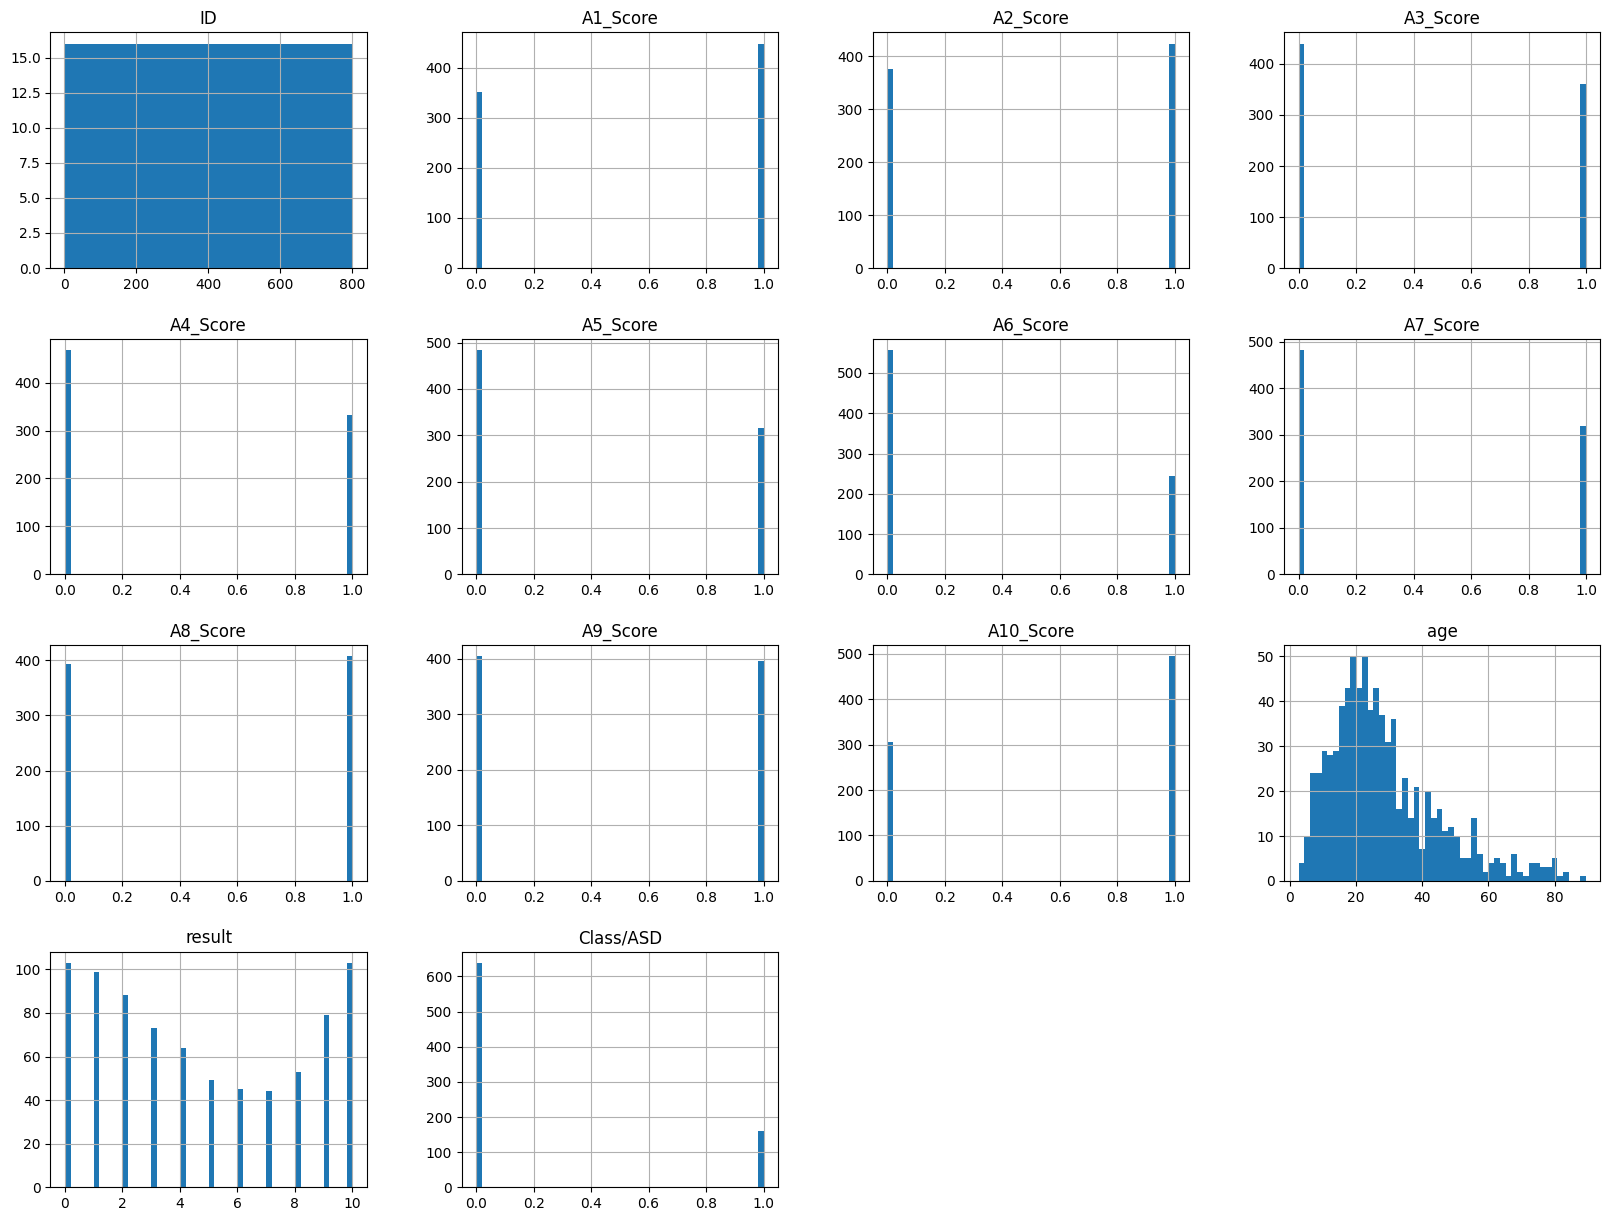

In [6]:
import matplotlib.pyplot as plt
train_d.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
train_copy = train_d.copy()
test_copy=test_d.copy()




Handling missing value

In [8]:
missing_values_count = (train_copy == '?').sum()
print("missing values in each column:")
print(missing_values_count)




missing values in each column:
ID                   0
A1_Score             0
A2_Score             0
A3_Score             0
A4_Score             0
A5_Score             0
A6_Score             0
A7_Score             0
A8_Score             0
A9_Score             0
A10_Score            0
age                  0
gender               0
ethnicity          203
jaundice             0
austim               0
contry_of_res        0
used_app_before      0
result               0
age_desc             0
relation            40
Class/ASD            0
dtype: int64


In [9]:
train_copy['ethnicity'].replace('?', 'Others', inplace=True)
train_copy['relation'].replace('?', 'Others', inplace=True)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_22244\1560118350.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_copy['ethnicity'].replace('?', 'Others', inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_22244\1560118350.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [10]:
missing_values_count = (train_copy == '?').sum()
print("missing values in each column:")
print(missing_values_count)

missing values in each column:
ID                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64


transforming data to numaric

In [11]:
train_copy['age']=train_copy['age'].astype(int)



In [12]:


ordinal_encoder = OrdinalEncoder()

gender_encoded = ordinal_encoder.fit_transform(train_copy[['gender']])
train_copy['gender'] = gender_encoded
print("Gender encoding:", dict(enumerate(ordinal_encoder.categories_[0])))


ordinal_encoder = OrdinalEncoder() 
jaundice_encoded = ordinal_encoder.fit_transform(train_copy[['jaundice']])
train_copy['jaundice'] = jaundice_encoded
print("Jaundice encoding:", dict(enumerate(ordinal_encoder.categories_[0])))

ordinal_encoder = OrdinalEncoder()
austim_encoded = ordinal_encoder.fit_transform(train_copy[['austim']])
train_copy['austim'] = austim_encoded
print("Autism encoding:", dict(enumerate(ordinal_encoder.categories_[0])))

ordinal_encoder = OrdinalEncoder()
used_app_before_encoded = ordinal_encoder.fit_transform(train_copy[['used_app_before']])
train_copy['used_app_before'] = used_app_before_encoded
print("Used App Before encoding:", dict(enumerate(ordinal_encoder.categories_[0])))


Gender encoding: {0: 'f', 1: 'm'}
Jaundice encoding: {0: 'no', 1: 'yes'}
Autism encoding: {0: 'no', 1: 'yes'}
Used App Before encoding: {0: 'no', 1: 'yes'}


Object to numiric

In [13]:
train_copy['age_desc'].value_counts()


age_desc
18 and more    800
Name: count, dtype: int64

not needed since all category are same [800 and more] (the above)

In [14]:
train_copy['contry_of_res'].value_counts()
#train_copy['relation'].value_counts()

contry_of_res
United States           134
India                   108
New Zealand              78
United Kingdom           67
Jordan                   55
United Arab Emirates     40
Australia                37
Canada                   30
Afghanistan              22
Netherlands              20
Austria                  18
Sri Lanka                17
Brazil                   12
France                   10
Spain                    10
Kazakhstan               10
Ireland                   9
Iran                      8
Russia                    7
South Africa              6
Bahamas                   6
Italy                     6
Malaysia                  6
Viet Nam                  5
Nicaragua                 4
Pakistan                  4
Armenia                   4
AmericanSamoa             4
Iraq                      4
Azerbaijan                4
Aruba                     4
Saudi Arabia              4
China                     4
Mexico                    4
Ukraine                   3
Niger 

In [15]:
country_mapping = train_copy['contry_of_res'].value_counts().to_dict()

ethnicity_mapping = train_copy['ethnicity'].value_counts().to_dict()

with open('country_mapping.txt', 'w') as f:
    for country, count in country_mapping.items():
        f.write(f"{country}: {count}\n")

with open('ethnicity_mapping.txt', 'w') as f:
    for ethnicity, count in ethnicity_mapping.items():
        f.write(f"{ethnicity}: {count}\n")

df = pd.DataFrame(train_copy[['contry_of_res']])
df['country_encoded'] = df['contry_of_res'].map(country_mapping)
train_copy['contry_of_res'] = df['country_encoded']

df = pd.DataFrame(train_copy[['ethnicity']])
df['ethnicity_encoded'] = df['ethnicity'].map(ethnicity_mapping)
train_copy['ethnicity'] = df['ethnicity_encoded']

print("Country Mapping:")
print(country_mapping)

print("\nEthnicity Mapping:")
print(ethnicity_mapping)

print("\nUpdated train_copy:")
print(train_copy.head())


Country Mapping:
{'United States': 134, 'India': 108, 'New Zealand': 78, 'United Kingdom': 67, 'Jordan': 55, 'United Arab Emirates': 40, 'Australia': 37, 'Canada': 30, 'Afghanistan': 22, 'Netherlands': 20, 'Austria': 18, 'Sri Lanka': 17, 'Brazil': 12, 'France': 10, 'Spain': 10, 'Kazakhstan': 10, 'Ireland': 9, 'Iran': 8, 'Russia': 7, 'South Africa': 6, 'Bahamas': 6, 'Italy': 6, 'Malaysia': 6, 'Viet Nam': 5, 'Nicaragua': 4, 'Pakistan': 4, 'Armenia': 4, 'AmericanSamoa': 4, 'Iraq': 4, 'Azerbaijan': 4, 'Aruba': 4, 'Saudi Arabia': 4, 'China': 4, 'Mexico': 4, 'Ukraine': 3, 'Niger': 3, 'Ethiopia': 3, 'Bolivia': 3, 'Iceland': 3, 'Serbia': 3, 'Germany': 3, 'Oman': 2, 'Cyprus': 2, 'Sweden': 2, 'Egypt': 1, 'Angola': 1, 'Hong Kong': 1, 'Tonga': 1, 'Argentina': 1, 'Japan': 1, 'Czech Republic': 1, 'Sierra Leone': 1, 'Romania': 1, 'Belgium': 1, 'Burundi': 1, 'Bangladesh': 1}

Ethnicity Mapping:
{'White-European': 257, 'Others': 232, 'Middle Eastern ': 97, 'Asian': 67, 'Black': 47, 'South Asian': 34, '

In [16]:
train_copy[['ethnicity']].value_counts()


ethnicity
257          257
232          232
97            97
67            67
47            47
34            34
32            32
17            17
9              9
5              5
3              3
Name: count, dtype: int64

In [17]:
train_copy = train_copy.drop(columns=['relation'])
train_copy = train_copy.drop(columns=['age_desc'])


In [18]:
train_copy


,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38,0.0,232,0.0,0.0,18,0.0,6,0
1,2,0,0,0,0,0,0,0,0,0,0,47,1.0,232,0.0,0.0,108,0.0,0,0
2,3,1,1,1,1,1,1,1,1,1,1,7,1.0,257,0.0,1.0,134,0.0,10,1
3,4,0,0,0,0,0,0,0,0,0,0,23,0.0,232,0.0,0.0,134,0.0,0,0
4,5,0,0,0,0,0,0,0,0,0,0,43,1.0,232,0.0,0.0,6,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,0,1,0,0,0,0,0,0,1,1,16,1.0,9,0.0,0.0,78,0.0,3,0
796,797,0,1,1,0,0,1,0,1,1,1,20,1.0,257,0.0,0.0,2,0.0,6,0
797,798,0,0,0,0,0,0,0,0,0,0,5,1.0,34,1.0,0.0,78,0.0,0,0
798,799,0,0,0,0,0,0,0,0,0,0,16,0.0,232,0.0,0.0,30,0.0,0,0


In [19]:
print(train_copy.dtypes)




ID                   int64
A1_Score             int64
A2_Score             int64
A3_Score             int64
A4_Score             int64
A5_Score             int64
A6_Score             int64
A7_Score             int64
A8_Score             int64
A9_Score             int64
A10_Score            int64
age                  int64
gender             float64
ethnicity            int64
jaundice           float64
austim             float64
contry_of_res        int64
used_app_before    float64
result               int64
Class/ASD            int64
dtype: object


In [20]:

gender_encoded_df = pd.DataFrame(gender_encoded, columns=['gender_encoded'])
jaundice_encoded_df = pd.DataFrame(jaundice_encoded, columns=['jaundice_encoded'])
ethnicity_encoded_df = pd.DataFrame(train_copy['ethnicity'])  
austim_encoded_df = pd.DataFrame(austim_encoded, columns=['austim_encoded'])
used_app_before_encoded_df = pd.DataFrame(used_app_before_encoded, columns=['used_app_before_encoded'])
country_encoded_df = pd.DataFrame(train_copy['contry_of_res'], columns=['country_encoded']) 

data_transformed = pd.concat(
    [
        train_copy.drop(columns=['gender', 'jaundice', 'austim', 'used_app_before', 'ethnicity']),
        gender_encoded_df,
        jaundice_encoded_df,
        ethnicity_encoded_df,
        austim_encoded_df,
        used_app_before_encoded_df,
        country_encoded_df,
    ],
    axis=1
)

# print data types and preview the transformed data
print(data_transformed.dtypes)
print(data_transformed.head())


ID                           int64
A1_Score                     int64
A2_Score                     int64
A3_Score                     int64
A4_Score                     int64
A5_Score                     int64
A6_Score                     int64
A7_Score                     int64
A8_Score                     int64
A9_Score                     int64
A10_Score                    int64
age                          int64
contry_of_res                int64
result                       int64
Class/ASD                    int64
gender_encoded             float64
jaundice_encoded           float64
ethnicity                    int64
austim_encoded             float64
used_app_before_encoded    float64
country_encoded             object
dtype: object
   ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0   1         1         0         1         0         1         0         1   
1   2         0         0         0         0         0         0         0   
2   3         

Relations between column 

In [21]:
correlation_matrix = data_transformed.corr()
correlation_matrix




,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,age,contry_of_res,result,Class/ASD,gender_encoded,jaundice_encoded,ethnicity,austim_encoded,used_app_before_encoded,country_encoded
ID,1.000000,0.011079,-0.001627,0.004113,-0.002010,-0.004362,0.009622,0.026733,-0.043303,0.047655,...,-0.039629,-0.034278,0.000358,0.047149,-0.013793,0.024154,0.073629,0.012586,-0.027437,NaN
A1_Score,0.011079,1.000000,0.401419,0.493016,0.383718,0.432912,0.371917,0.447262,0.191815,0.439397,...,0.056050,0.046925,0.640789,0.300474,-0.094794,0.127812,0.153059,0.262947,0.031209,NaN
A2_Score,-0.001627,0.401419,1.000000,0.489330,0.488173,0.427895,0.447721,0.452713,0.302040,0.511547,...,0.083082,0.091736,0.700512,0.372740,-0.047139,0.160084,0.202813,0.315189,0.077599,NaN
A3_Score,0.004113,0.493016,0.489330,1.000000,0.558896,0.579769,0.511669,0.559118,0.315882,0.597022,...,0.110244,0.121354,0.789851,0.460927,-0.061107,0.183246,0.257913,0.366994,0.057090,NaN
A4_Score,-0.002010,0.383718,0.488173,0.558896,1.000000,0.559748,0.563543,0.554838,0.360781,0.576723,...,0.102915,0.137762,0.779944,0.501046,-0.005097,0.223980,0.213874,0.395126,0.065503,NaN
A5_Score,-0.004362,0.432912,0.427895,0.579769,0.559748,1.000000,0.494944,0.550663,0.292747,0.524624,...,0.096118,0.118966,0.744213,0.461773,-0.045153,0.181482,0.232451,0.395629,0.044895,NaN
A6_Score,0.009622,0.371917,0.447721,0.511669,0.563543,0.494944,1.000000,0.496588,0.333694,0.536666,...,0.058929,0.172683,0.722687,0.543010,-0.028670,0.192151,0.242604,0.390835,0.031582,NaN
A7_Score,0.026733,0.447262,0.452713,0.559118,0.554838,0.550663,0.496588,1.000000,0.271903,0.539433,...,0.103069,0.104951,0.748273,0.452338,-0.063065,0.184542,0.190638,0.392940,0.032975,NaN
A8_Score,-0.043303,0.191815,0.302040,0.315882,0.360781,0.292747,0.333694,0.271903,1.000000,0.352747,...,0.015590,0.144300,0.517822,0.312388,-0.035098,0.100110,0.093408,0.211854,0.067788,NaN
A9_Score,0.047655,0.439397,0.511547,0.597022,0.576723,0.524624,0.536666,0.539433,0.352747,1.000000,...,0.125676,0.105883,0.782918,0.463347,-0.044149,0.156691,0.224946,0.359126,0.043896,NaN


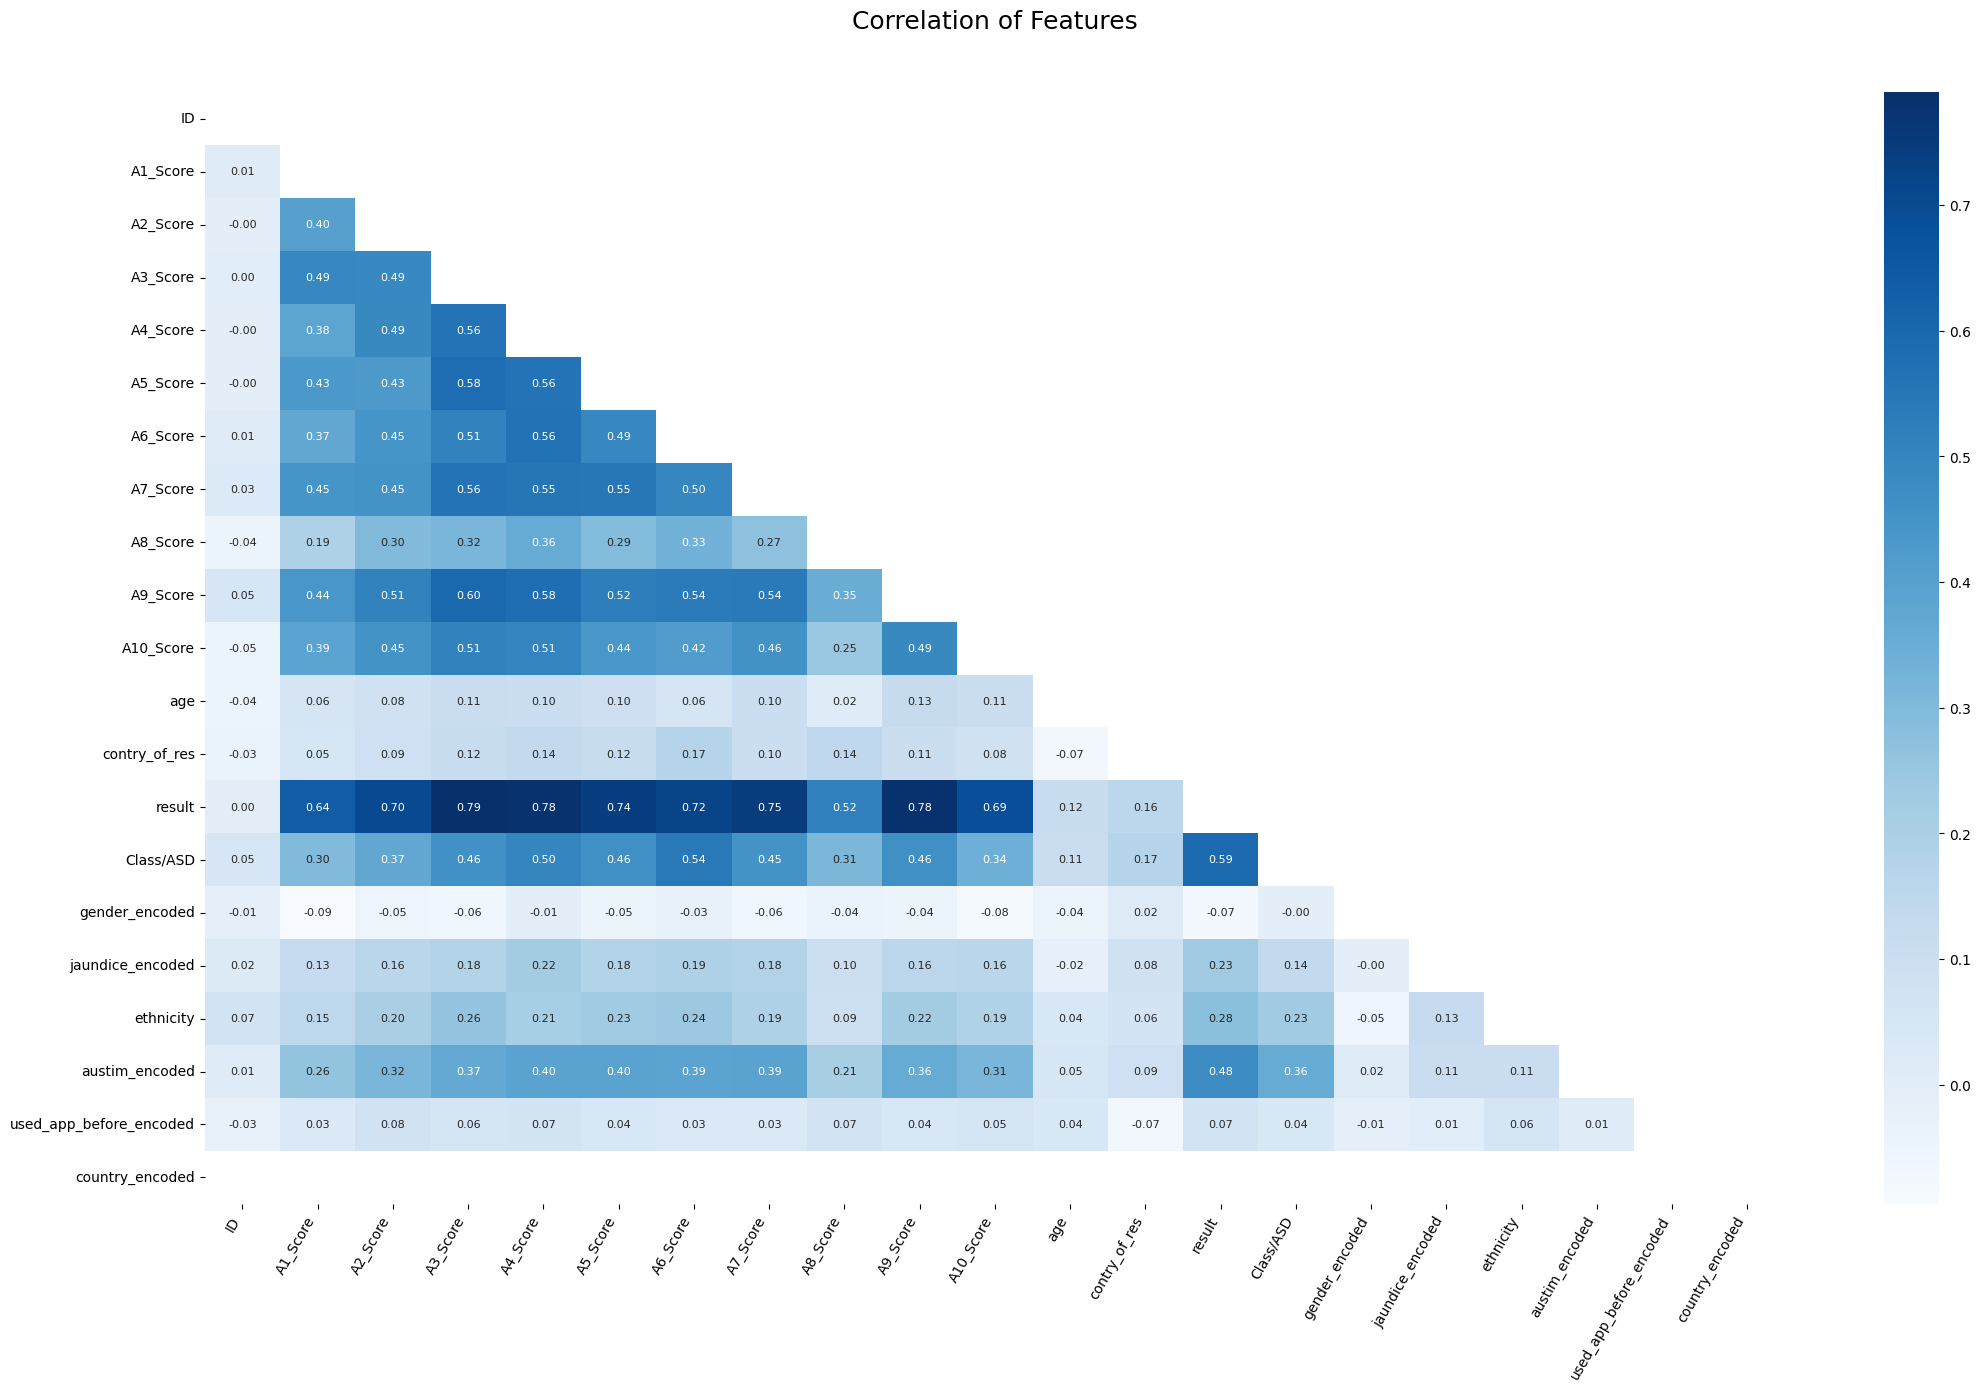

In [22]:


plt.figure(figsize=(22, 14))  
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  
plt.title('Correlation of Features', y=1.05, size=18)


sns.heatmap(correlation_matrix, annot=True, cbar=True, cmap="Blues", mask=mask, fmt=".2f",
            annot_kws={"size": 8}, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)


plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()



we will remove country of res and eithnithy since the dont have any realtion betten the feature

In [23]:
X = train_copy.drop(['ID','ethnicity','contry_of_res','Class/ASD'],axis=1)
y = train_copy['Class/ASD']



In [55]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

desired_ratio = 0.3
majority_count = sum(y == max(Counter(y), key=Counter(y).get))
minority_target_count = int(desired_ratio * majority_count)

ros = RandomOverSampler(sampling_strategy={0: majority_count, 1: minority_target_count}, random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

print("Before oversampling:", Counter(y))
print("After oversampling:", Counter(y_resampled))


Before oversampling: Counter({0: 639, 1: 161})
After oversampling: Counter({0: 639, 1: 191})


Class/ASD
0    639
1    161
Name: count, dtype: int64


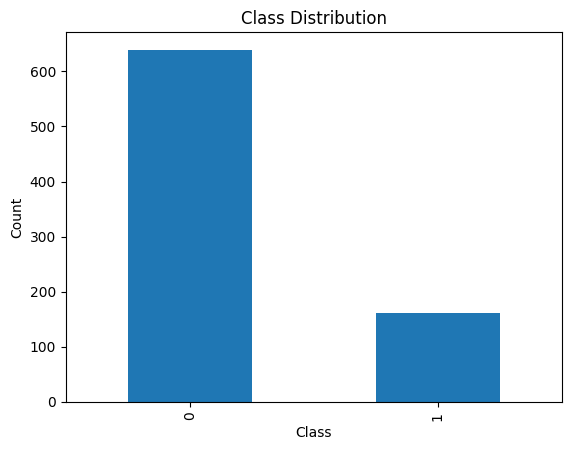

Class/ASD
0    79.875
1    20.125
Name: count, dtype: float64


In [56]:
class_distribution = train_copy['Class/ASD'].value_counts()
print(class_distribution)

class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

class_ratios = class_distribution / len(train_copy) * 100
print(class_ratios)



The data is impalnced

In [57]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_resampled)


print(X_train_scaled[:5])


[[ 0.86663421 -1.0961713   1.06990787 -0.87304528  1.19452944 -0.68295761
   1.19750474 -1.04183834  0.97854339  0.76417895  0.60154547 -1.41293662
  -0.54858039 -0.44656687 -0.25853055  0.33486558]
 [-1.15388937 -1.0961713  -0.93465992 -0.87304528 -0.83714973 -0.68295761
  -0.83506977 -1.04183834 -1.02192709 -1.30859402  1.14987307  0.70774583
  -0.54858039 -0.44656687 -0.25853055 -1.36679827]
 [ 0.86663421  0.91226618  1.06990787  1.14541596  1.19452944  1.46421972
   1.19750474  0.95984181  0.97854339  0.76417895 -1.28713848  0.70774583
  -0.54858039  2.23930631 -0.25853055  1.46930814]
 [-1.15388937 -1.0961713  -0.93465992 -0.87304528 -0.83714973 -0.68295761
  -0.83506977 -1.04183834 -1.02192709 -1.30859402 -0.31233386 -1.41293662
  -0.54858039 -0.44656687 -0.25853055 -1.36679827]
 [-1.15388937 -1.0961713  -0.93465992 -0.87304528 -0.83714973 -0.68295761
  -0.83506977 -1.04183834 -1.02192709 -1.30859402  0.90617191  0.70774583
  -0.54858039 -0.44656687 -0.25853055 -1.36679827]]


Traing the model


Logistic Regression

In [58]:

logreg = LogisticRegression(random_state=42, max_iter=1000)

logreg.fit(X_train_scaled, y_resampled)

train_accuracy = logreg.score(X_train_scaled, y_resampled)

print(f"Training Accuracy: {train_accuracy:.4f}")


Training Accuracy: 0.8590


In [59]:

logreg_f1 = cross_val_score(logreg, X_train_scaled, y_resampled, cv=5, scoring='f1')

print("F1 Scores for each fold:", logreg_f1)
print("Mean F1 Score:", logreg_f1.mean())


F1 Scores for each fold: [0.56790123 0.66666667 0.77333333 0.725      0.65789474]
Mean F1 Score: 0.6781591942820013


c:\Users\ASUS\Desktop\ML-PROJECT-2\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


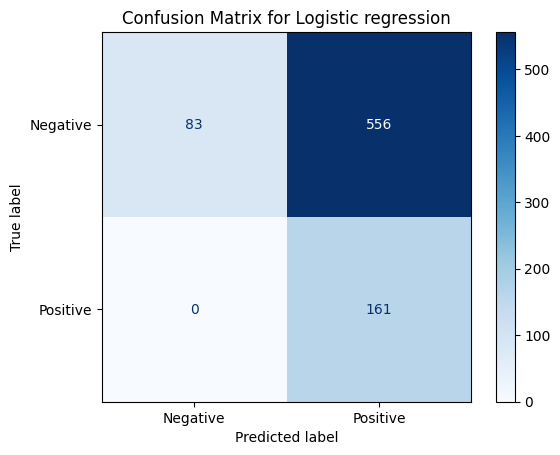

In [60]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y, logreg.predict(X))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Logistic regression')
plt.show()


Super Vector Machine

In [61]:

svm_model = SVC()

param_grid = {
    'C': [0.1, 1, 10, 100], 
    'gamma': [0.001, 0.01, 0.1, 1],  
    'kernel': ['rbf'] 
}

grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='f1', verbose=1)

grid_search.fit(X_train_scaled, y_resampled)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best F1 Score: {grid_search.best_score_}")

svm = grid_search.best_estimator_

train_accuracy = svm.score(X_train_scaled, y_resampled)
print(f"Training Accuracy (Best Model): {train_accuracy:.4f}")

svm_f1 = cross_val_score(svm, X_train_scaled, y_resampled, cv=5, scoring='f1')
print("F1 Scores for each fold (Best Model):", svm_f1)
print("Mean F1 Score (Best Model):", svm_f1.mean())



Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best F1 Score: 0.6947579687808098
Training Accuracy (Best Model): 0.9120
F1 Scores for each fold (Best Model): [0.65853659 0.65789474 0.68965517 0.76315789 0.70454545]
Mean F1 Score (Best Model): 0.6947579687808098


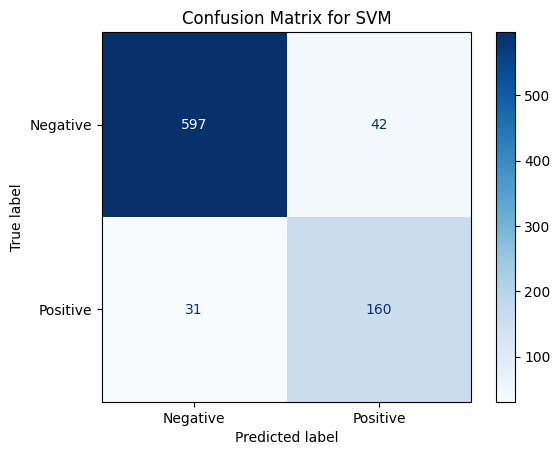

In [62]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_resampled, svm.predict(X_train_scaled))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for SVM')
plt.show()


Decision Tree

In [63]:

param_grid = {'max_depth': range(1, 21)}

dt_model = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_resampled)

print(f"Best Depth: {grid_search.best_params_['max_depth']}")


Best Depth: 4


c:\Users\ASUS\Desktop\ML-PROJECT-2\.venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [64]:
train_accuracy = grid_search.score(X_train_scaled, y_resampled)
print(f"Training Accuracy: {train_accuracy:.4f}")


dt_f1 = cross_val_score(grid_search, X_train_scaled, y_resampled, cv=5, scoring='f1')

print("F1 Scores for each fold:", dt_f1)
print("Mean F1 Score:", dt_f1.mean())



Training Accuracy: 0.8831
F1 Scores for each fold: [0.58227848 0.6        0.66666667 0.70422535 0.75324675]
Mean F1 Score: 0.6612834506077508


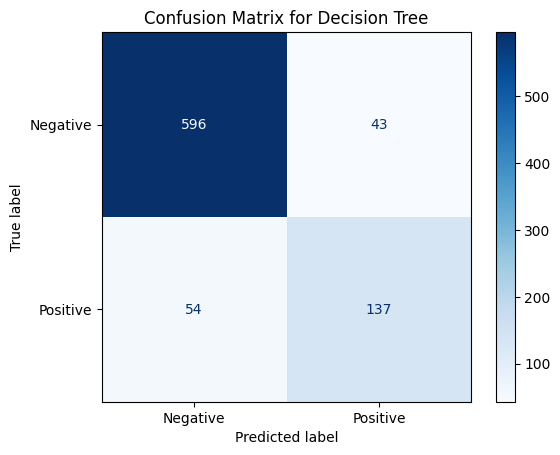

In [65]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_resampled, grid_search.predict(X_train_scaled))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Decision Tree')
plt.show()


RandomForest

In [66]:


rf_model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [15, 20, 25],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}


grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=5),
    scoring='f1',
    verbose=1,
    n_jobs=-1
)


grid_search.fit(X_train_scaled, y_resampled)

best_rf_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best F1 Score from Grid Search: {grid_search.best_score_:.4f}")

train_accuracy = best_rf_model.score(X_train_scaled, y_resampled)
print(f"Training Accuracy: {train_accuracy:.4f}")

rf_f1 = cross_val_score(best_rf_model, X_train_scaled, y_resampled, cv=5, scoring='f1')
accuracy_scores = cross_val_score(best_rf_model, X_train_scaled, y_resampled, cv=5, scoring='accuracy')

print("Mean Cross-Validation F1 Score:", rf_f1.mean())
print("Cross-Validation Accuracy for Each Fold:", accuracy_scores)




Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 400}
Best F1 Score from Grid Search: 0.7130
Training Accuracy: 0.9482
Mean Cross-Validation F1 Score: 0.7130176990282772
Cross-Validation Accuracy for Each Fold: [0.81325301 0.88554217 0.87349398 0.88554217 0.88554217]


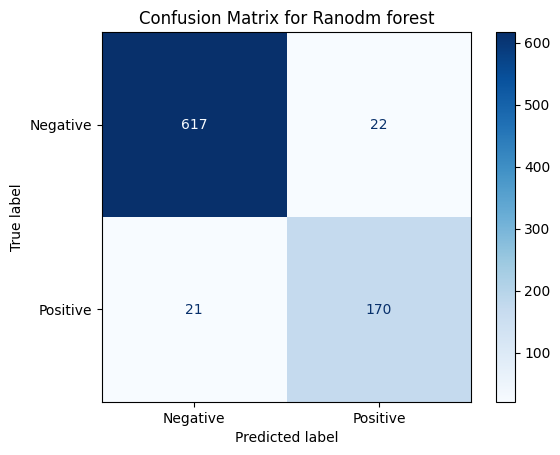

In [67]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_resampled, grid_search.predict(X_train_scaled))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Ranodm forest')
plt.show()

 Compare F1-scores for models

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22244\2724514379.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=f1_scores, palette='Blues_d')


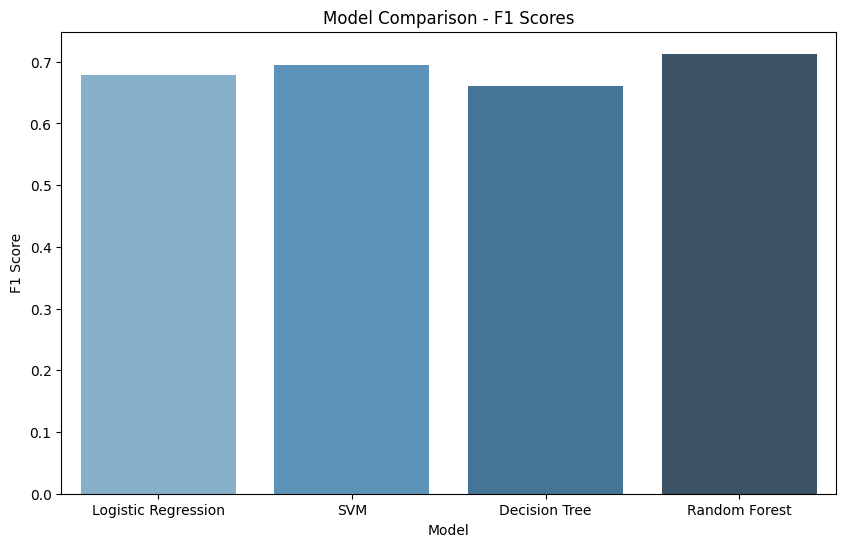

In [68]:
models = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest']
f1_scores = [logreg_f1.mean(), svm_f1.mean(), dt_f1.mean(), rf_f1.mean()]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=f1_scores, palette='Blues_d')
plt.title('Model Comparison - F1 Scores')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.show()

The best model foumd is SVM

Saving the model

In [69]:

from joblib import dump

dump(svm, 'svm_model_best.joblib')



['svm_model_best.joblib']

Make predtion on test set with the test set 

In [70]:
missing_values_count = (test_copy == '?').sum()
print("missing values in each column:")
print(missing_values_count)

missing values in each column:
ID                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
austim             0
contry_of_res      0
used_app_before    0
result             0
dtype: int64


In [71]:
test_copy['ethnicity'].replace('?', 'Others', inplace=True)
test_copy['relation'].replace('?', 'Others', inplace=True)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_22244\2043164179.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_copy['ethnicity'].replace('?', 'Others', inplace=True)


KeyError: 'relation'

In [41]:
missing_values_count = (test_copy == '?').sum()
print("missing values in each column:")
print(missing_values_count)

missing values in each column:
ID                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
dtype: int64


In [ ]:


ordinal_encoder = OrdinalEncoder()

gender_encoded = ordinal_encoder.fit_transform(test_copy[['gender']])
test_copy['gender'] = gender_encoded
print("Gender encoding:", dict(enumerate(ordinal_encoder.categories_[0])))


ordinal_encoder = OrdinalEncoder() 
jaundice_encoded = ordinal_encoder.fit_transform(test_copy[['jaundice']])
test_copy['jaundice'] = jaundice_encoded
print("Jaundice encoding:", dict(enumerate(ordinal_encoder.categories_[0])))

ordinal_encoder = OrdinalEncoder()
austim_encoded = ordinal_encoder.fit_transform(test_copy[['austim']])
test_copy['austim'] = austim_encoded
print("Autism encoding:", dict(enumerate(ordinal_encoder.categories_[0])))

ordinal_encoder = OrdinalEncoder()
used_app_before_encoded = ordinal_encoder.fit_transform(test_copy[['used_app_before']])
test_copy['used_app_before'] = used_app_before_encoded
print("Used App Before encoding:", dict(enumerate(ordinal_encoder.categories_[0])))


Gender encoding: {0: 'f', 1: 'm'}
Jaundice encoding: {0: 'no', 1: 'yes'}
Autism encoding: {0: 'no', 1: 'yes'}
Used App Before encoding: {0: 'no', 1: 'yes'}


Object to numeric

In [ ]:


df = pd.DataFrame(test_copy[['contry_of_res']]) 
contry_of_res_count = df['contry_of_res'].value_counts()
df['country_encoded'] = df['contry_of_res'].map(contry_of_res_count)
test_copy['contry_of_res'] = df['country_encoded']

df = pd.DataFrame(test_copy[['ethnicity']])

ethnicity_count = df['ethnicity'].value_counts()

df['ethnicity_encoded'] = df['ethnicity'].map(ethnicity_count)

test_copy['ethnicity'] = df['ethnicity_encoded']


print(test_copy.head())


   ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0   1         1         1         0         0         1         1         0   
1   2         1         0         0         0         0         0         0   
2   3         1         1         1         0         1         1         0   
3   4         0         0         0         0         0         0         0   
4   5         0         0         0         1         0         0         0   

   A8_Score  A9_Score  ...        age  gender  ethnicity  jaundice  austim  \
0         0         1  ...  15.599481     1.0         66       1.0     0.0   
1         1         0  ...  27.181099     1.0         17       0.0     0.0   
2         1         1  ...  31.643906     1.0         66       1.0     0.0   
3         0         0  ...  25.369210     1.0         61       0.0     0.0   
4         0         0  ...   9.078580     1.0         61       0.0     0.0   

   contry_of_res  used_app_before  result     age_desc r

In [44]:
test_copy = test_copy.drop(columns=['relation'])
test_copy = test_copy.drop(columns=['age_desc'])


In [45]:
print(test_copy.dtypes)


ID                   int64
A1_Score             int64
A2_Score             int64
A3_Score             int64
A4_Score             int64
A5_Score             int64
A6_Score             int64
A7_Score             int64
A8_Score             int64
A9_Score             int64
A10_Score            int64
age                float64
gender             float64
ethnicity            int64
jaundice           float64
austim             float64
contry_of_res        int64
used_app_before    float64
result               int64
dtype: object


In [46]:

gender_encoded_df = pd.DataFrame(gender_encoded, columns=['gender_encoded'])
jaundice_encoded_df = pd.DataFrame(jaundice_encoded, columns=['jaundice_encoded'])
ethnicity_encoded_df = pd.DataFrame(test_copy['ethnicity'])  
austim_encoded_df = pd.DataFrame(austim_encoded, columns=['austim_encoded'])
used_app_before_encoded_df = pd.DataFrame(used_app_before_encoded, columns=['used_app_before_encoded'])
country_encoded_df = pd.DataFrame(test_copy['contry_of_res'], columns=['country_encoded']) 

data_transformed2 = pd.concat(
    [
        test_copy.drop(columns=['gender', 'jaundice', 'austim', 'used_app_before', 'ethnicity']),
        gender_encoded_df,
        jaundice_encoded_df,
        ethnicity_encoded_df,
        austim_encoded_df,
        used_app_before_encoded_df,
        country_encoded_df,
    ],
    axis=1
)

print(data_transformed2.dtypes)
print(data_transformed2.head())


ID                           int64
A1_Score                     int64
A2_Score                     int64
A3_Score                     int64
A4_Score                     int64
A5_Score                     int64
A6_Score                     int64
A7_Score                     int64
A8_Score                     int64
A9_Score                     int64
A10_Score                    int64
age                        float64
contry_of_res                int64
result                       int64
gender_encoded             float64
jaundice_encoded           float64
ethnicity                    int64
austim_encoded             float64
used_app_before_encoded    float64
country_encoded             object
dtype: object
   ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0   1         1         1         0         0         1         1         0   
1   2         1         0         0         0         0         0         0   
2   3         1         1         1         0    

In [ ]:
correlation_matrix2 = data_transformed2.corr()
correlation_matrix2


,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,contry_of_res,result,gender_encoded,jaundice_encoded,ethnicity,austim_encoded,used_app_before_encoded,country_encoded
ID,1.000000,0.132180,0.040342,0.107089,0.052820,0.039864,0.044608,-0.008773,0.077826,0.048133,0.162562,-0.135288,-0.092208,0.096596,-1.118048e-02,-0.031602,0.016135,0.075879,-8.706361e-02,NaN
A1_Score,0.132180,1.000000,0.369904,0.412679,0.411765,0.391367,0.403545,0.321738,0.311271,0.464731,0.514150,0.032859,0.055225,0.639261,1.488575e-01,0.158337,0.241976,0.181692,7.226101e-02,NaN
A2_Score,0.040342,0.369904,1.000000,0.569665,0.505248,0.425704,0.451539,0.333902,0.394081,0.566442,0.523175,0.120777,0.097022,0.714967,-2.857528e-02,0.181977,0.158583,0.225880,8.009446e-02,NaN
A3_Score,0.107089,0.412679,0.569665,1.000000,0.620285,0.528306,0.564343,0.468616,0.366444,0.656925,0.525657,0.095514,0.135411,0.794679,7.497145e-02,0.188316,0.185240,0.347636,2.145988e-01,NaN
A4_Score,0.052820,0.411765,0.505248,0.620285,1.000000,0.523518,0.493222,0.497977,0.501181,0.631141,0.539437,0.052472,0.123195,0.796062,1.436345e-01,0.183398,0.216405,0.335376,1.858140e-01,NaN
A5_Score,0.039864,0.391367,0.425704,0.528306,0.523518,1.000000,0.454030,0.472424,0.301731,0.572697,0.531833,0.079192,0.138456,0.723466,7.784989e-02,0.129037,0.108792,0.284013,1.230915e-01,NaN
A6_Score,0.044608,0.403545,0.451539,0.564343,0.493222,0.454030,1.000000,0.351578,0.274277,0.556555,0.406368,0.232875,0.240632,0.686030,5.450583e-02,0.205414,0.252665,0.363924,1.228083e-01,NaN
A7_Score,-0.008773,0.321738,0.333902,0.468616,0.497977,0.472424,0.351578,1.000000,0.350316,0.480511,0.448275,0.046439,0.198447,0.657182,-7.323923e-02,0.189850,0.097713,0.368852,1.881773e-01,NaN
A8_Score,0.077826,0.311271,0.394081,0.366444,0.501181,0.301731,0.274277,0.350316,1.000000,0.405742,0.381548,0.061176,0.117406,0.597183,-2.333259e-02,0.080740,0.158597,0.176661,1.352709e-01,NaN
A9_Score,0.048133,0.464731,0.566442,0.656925,0.631141,0.572697,0.556555,0.480511,0.405742,1.000000,0.603601,0.066605,0.157081,0.825828,3.108349e-02,0.222355,0.239892,0.323102,1.883981e-01,NaN


In [48]:
X_test = test_copy.drop(['ID','ethnicity','contry_of_res'],axis=1)
X_test_scaled = scaler.transform(X_test)  


saving the scaler to use in front-end

In [49]:
scaler_path = 'scaler.joblib'
dump(scaler, scaler_path)
print(f"Scaler saved to {scaler_path}")


Scaler saved to scaler.joblib


Predicting on test set

In [50]:

y_pred = svm.predict(X_test_scaled) 
print(y_pred)



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1
 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0]


In [51]:
submission = pd.DataFrame({'ID': test_copy['ID'], 'Prediction': y_pred})  

submission.to_csv('predictions.csv', index=False)
